# Neural networks
A family of algorithms known as neural networks has become increasingly popular during the past few years under
the name “deep learning.” While deep learning shows great promise in many machine
learning applications, deep learning algorithms are often tailored very carefully to a
specific use case. Here, we will only discuss some relatively simple methods, namely
**multilayer perceptrons** for classification and regression, that can serve as a starting
point for more involved deep learning methods. Multilayer perceptrons (MLPs) are
also known as (vanilla) **feed-forward neural networks**, or sometimes just neural
networks.

MLPs can be viewed as generalizations of linear models that perform multiple stages
of processing to come to a decision. Remember that the prediction by a linear regressor is given as:

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

We could visualize this graphically as shown in the following figure:

<img src="perceptron.png">

In an MLP this process of computing weighted sums is repeated multiple times, first
computing hidden units that represent an intermediate processing step, which are
again combined using weighted sums to yield the final result. Note that there can be several layers of hidden units, each of which will create a more complex representation of the input.

<img src="MLP.png">

Computing a series of weighted sums is mathematically the same as computing just
one weighted sum, so to make this model truly more powerful than a linear model,
we need one extra trick. After computing a weighted sum for each hidden unit, a
nonlinear function is applied to the result.

Let’s look into the workings of the MLP by applying the `MLPClassifier` to the
two_moons dataset. Import the `make_moons` method from sklearn and generate a dataset with 100 samples `noise=0.25` and `random_state=3`. Then make a scatter plot of the data.

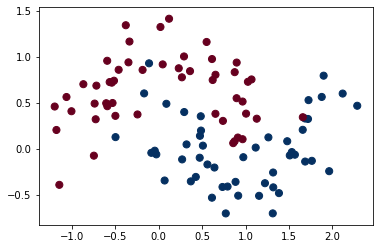

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

Now import the `Perceptron` classifier from sklearn and apply it to the data.

In [2]:
from sklearn.linear_model import Perceptron

perc = Perceptron(random_state=0,)
perc.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Function to visualize the input data and the decision function of the model,

In [4]:
def visualize_classifier(model, X, y, ax=None, cmap='RdBu', figsize=(7,7)):
    import numpy as np
    
    if ax is None:
        plt.figure(figsize=figsize)
    
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Now import the `MLPClassifier` from sklearn, create an instance with random state to 0 and the solver to ```lbfgs```. Leave the rest of the parameters as default. Fit the MLP model and then plot the results using the above function.

In [7]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(solver='lbfgs',random_state=0)

mlp.fit(X,y)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

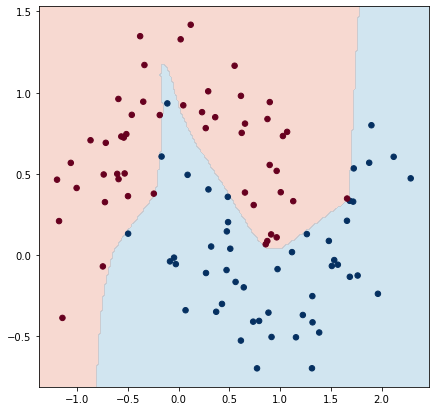

In [8]:
visualize_classifier(mlp, X, y)

How many hidden units does the model have by default? Is this a good idea for such a small data set? Try different numbers and see the effect on the decision boundary.

#### Default hidden units = ????

In [9]:
mlp=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(10,),random_state=0)

mlp.fit(X,y)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

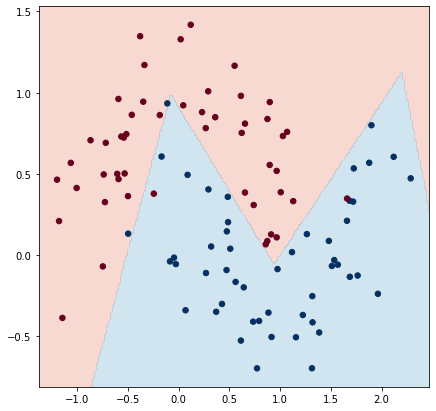

In [10]:
visualize_classifier(mlp,X,y)

With only 10 hidden units, the decision boundary looks somewhat more ragged. The
default nonlinearity is relu. With a single hidden layer, this
means the decision function will be made up of 10 straight line segments. If we want
a smoother decision boundary, we could add more hidden units,
add a second hidden layer, or use the tanh nonlinearity. Try a model with 2 hidden layers of 10 units each, then try a model with one hidden layer of 10 units and tanh activation.

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


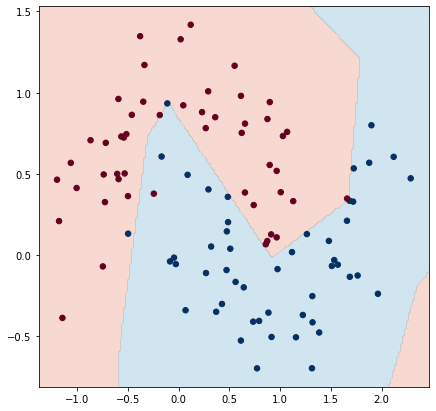

In [19]:
mlp=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(10,10),random_state=0)

mlp.fit(X,y)

visualize_classifier(mlp,X,y)

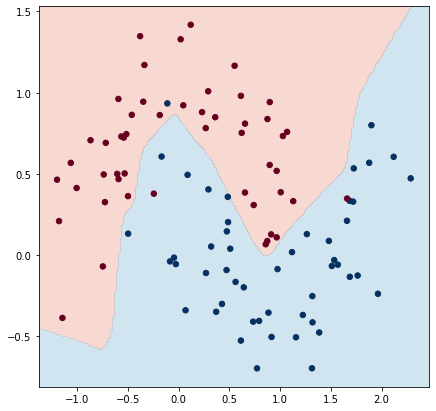

In [20]:
mlp=MLPClassifier(solver='lbfgs',activation='tanh',hidden_layer_sizes=(10,),random_state=0)

mlp.fit(X,y)

visualize_classifier(mlp,X,y)

Finally, we can also control the complexity of a neural network by using an l2 penalty
to shrink the weights towards zero, as we did in ridge regression. The parameter for this in the MLPClassifier is **alpha**, and it is set to a very low value (little regularization) by default. Generate a plot with 4 different parameters for alpha [0.0001, 0.01, 1, 2] and for MLP with 2 layers of size 10,10 and 100,100.

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs 

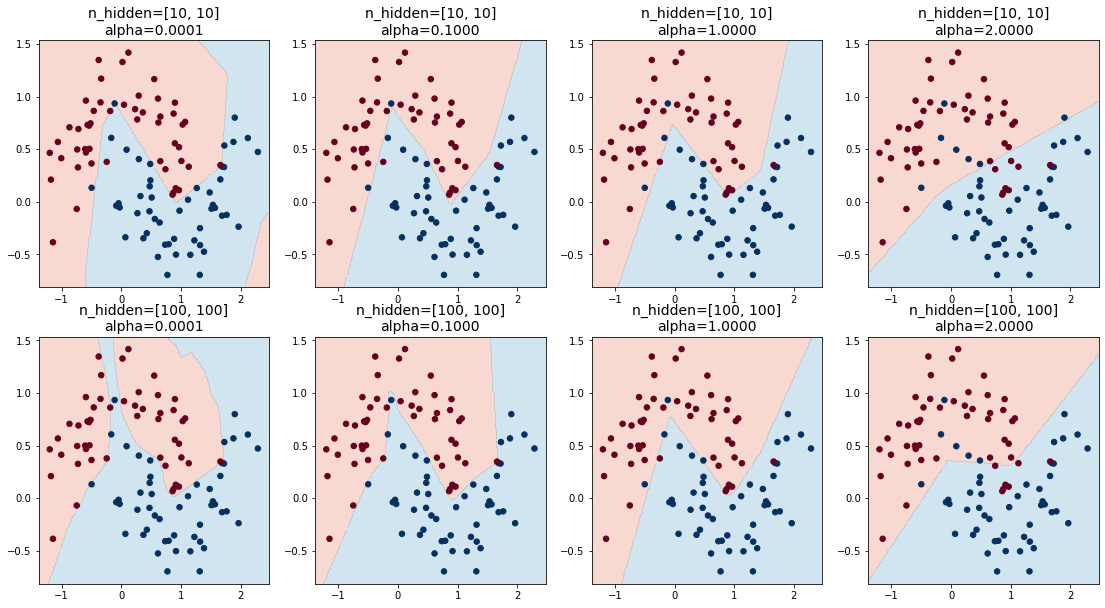

In [22]:
fig, axes = plt.subplots(2, 4, figsize=(19, 10))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
     for ax, alpha in zip(axx, [0.0001, 0.1, 1, 2]):
        
        
        mlp=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(n_hidden_nodes,n_hidden_nodes),alpha=alpha,random_state=0)       
        # PUT YOU CODE HERE
        mlp.fit(X, y)
        visualize_classifier(mlp, X, y, ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
        n_hidden_nodes, n_hidden_nodes, alpha), fontdict={'fontsize': 14})

An important property of neural networks is that their weights are set randomly
before learning is started, and this random initialization affects the model that is
learned. That means that even when using exactly the same parameters, we can
obtain very different models when using different random seeds. If the networks are
large, and their complexity is chosen properly, this should not affect accuracy too
much, but it is worth keeping in mind (particularly for smaller networks). 

**Try to generate 8 diffenet models with 2 hidden layers of 100 hidden units each, solver='lbfgs' and random_state that changes from 0 to 7 and print the decision boundaries using the ```visualize_classifier``` function**

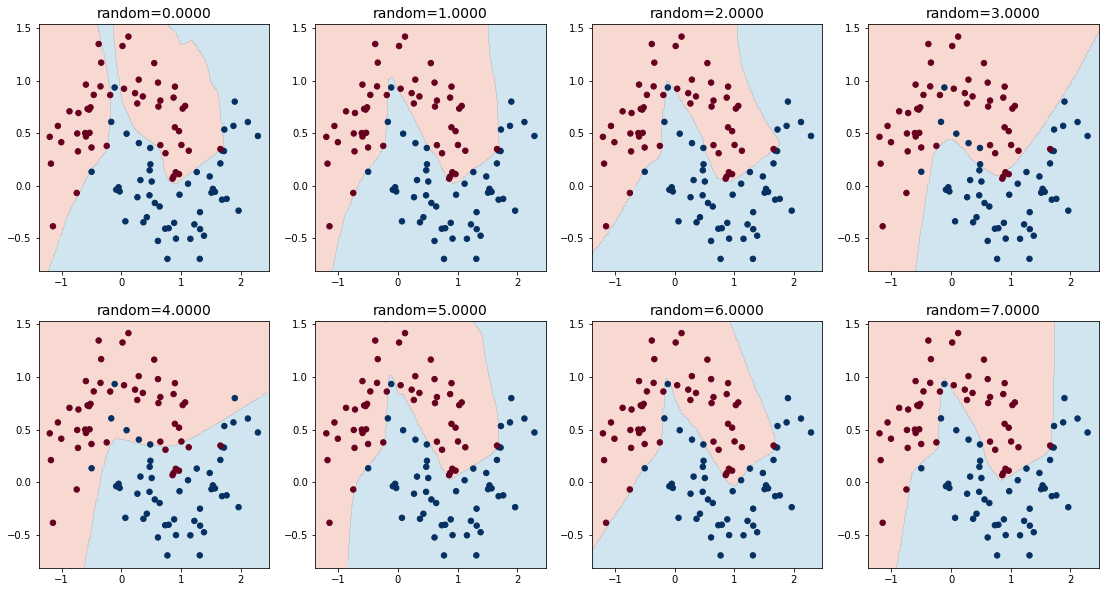

In [74]:
fig, axes = plt.subplots(2, 4, figsize=(19, 10))
for random,ax in enumerate(axes.ravel()):
        mlp=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(100,100),random_state=random)
        mlp.fit(X, y)        
        visualize_classifier(mlp, X, y,ax=ax)
        ax.set_title("random={:.4f}".format(int(random)), fontdict={'fontsize': 14})

## Neural networks and the Breast cancer dataset

We will use the Breast cancer dataset to check an application of neural networks with real-world data. Load the breast cancer dataset from sklearn and print the description. 

In [69]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [70]:
dir(cancer)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [71]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Print the dataset target names, the feature names and the input shape

In [75]:
print(cancer.target_names)

['malignant' 'benign']


In [76]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [77]:
print(cancer.data.shape)

(569, 30)


Now split he dataset in train and test with `random_state=0` and train a MLP with the default parameters and `random state=42`. After training print the accuracy on the training and the test set.

In [79]:
type(cancer)

sklearn.utils.Bunch

In [88]:
import pandas as pd

X=pd.DataFrame(cancer.data,columns=cancer.feature_names)
y=pd.DataFrame(cancer.target,columns=['target'])


In [93]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(398, 30)
(171, 30)
(398, 1)
(171, 1)


In [101]:
mlp=MLPClassifier(solver='adam',random_state=42)

mlp.fit(X_train,y_train)


/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [103]:
from sklearn.metrics import accuracy_score

y_train_pred=mlp.predict(X_train)
y_pred=mlp.predict(X_test)

print('Accuracy on train set',accuracy_score(y_train_pred,y_train).round(2))
print('Accuracy on test set',accuracy_score(y_pred,y_test).round(2))



Accuracy on train set 0.93
Accuracy on test set 0.95


Now **normalize the data:** subtract the mean and divide by the standard deviation. **You have to compute the mean and std on the training set, and use the same one for the test set.**

In [104]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean()# PUT YOU CODE HERE


# compute the standard deviation of each feature on the training set
std_on_train = X_train.std()# PUT YOU CODE HERE


# subtract the mean, and scale by inverse standard deviation
X_train_scaled = (X_train-mean_on_train)/std_on_train# PUT YOU CODE HERE


# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test-X_test.mean())/X_test.std()# PUT YOU CODE HERE


In [105]:
X_train_scaled.mean(axis=0)

mean radius               -2.280420e-15
mean texture              -1.534228e-16
mean perimeter             2.392837e-15
mean area                 -6.346124e-16
mean smoothness           -1.382897e-15
mean compactness           1.730888e-16
mean concavity             1.340497e-15
mean concave points        5.465338e-16
mean symmetry             -3.776990e-15
mean fractal dimension    -1.684164e-15
radius error              -3.048929e-16
texture error              1.417069e-16
perimeter error           -4.624999e-16
area error                 3.765832e-18
smoothness error           2.169259e-15
compactness error          5.404666e-16
concavity error            4.580367e-16
concave points error       3.382972e-16
symmetry error            -1.403121e-16
fractal dimension error    1.171871e-15
worst radius               1.035185e-15
worst texture             -7.263871e-16
worst perimeter           -1.852789e-15
worst area                -2.050286e-16
worst smoothness           3.583642e-15


In [106]:
X_train_scaled.std(axis=0)

mean radius                1.0
mean texture               1.0
mean perimeter             1.0
mean area                  1.0
mean smoothness            1.0
mean compactness           1.0
mean concavity             1.0
mean concave points        1.0
mean symmetry              1.0
mean fractal dimension     1.0
radius error               1.0
texture error              1.0
perimeter error            1.0
area error                 1.0
smoothness error           1.0
compactness error          1.0
concavity error            1.0
concave points error       1.0
symmetry error             1.0
fractal dimension error    1.0
worst radius               1.0
worst texture              1.0
worst perimeter            1.0
worst area                 1.0
worst smoothness           1.0
worst compactness          1.0
worst concavity            1.0
worst concave points       1.0
worst symmetry             1.0
worst fractal dimension    1.0
dtype: float64

After doing that, you can check that the mean and std has been actually set to 0 and 1.

Run again the MLP on the normalized data and print the accuracy on the training and the test. Did the results improve?

In [109]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_scaled,y_train)

y_train_pred_scaled=mlp.predict(X_train_scaled)
y_pred_scaled=mlp.predict(X_test_scaled)

print('Accuracy on train',accuracy_score(y_train_pred_scaled,y_train).round(2))
print('Accuracy on test',accuracy_score(y_pred_scaled,y_test).round(2))

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on train 0.99
Accuracy on test 0.96


/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


You should have a warning saying that the optimization has not converged. This usually means we should add more iterations, set `max_iter` to 1000. What are the accuracies now? 

In [110]:
mlp = MLPClassifier(random_state=42,max_iter=1000)
mlp.fit(X_train_scaled,y_train)

y_train_pred_scaled=mlp.predict(X_train_scaled)
y_pred_scaled=mlp.predict(X_test_scaled)

print('Accuracy on train',accuracy_score(y_train_pred_scaled,y_train).round(2))
print('Accuracy on test',accuracy_score(y_pred_scaled,y_test).round(2))

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on train 1.0
Accuracy on test 0.95


Is there a way you can think of to further improve the results?

In [118]:
mlp = MLPClassifier(random_state=42,hidden_layer_sizes=(100,100),alpha=1,max_iter=1000)
mlp.fit(X_train_scaled,y_train)

y_train_pred_scaled=mlp.predict(X_train_scaled)
y_pred_scaled=mlp.predict(X_test_scaled)

print('Accuracy on train',accuracy_score(y_train_pred_scaled,y_train).round(2))
print('Accuracy on test',accuracy_score(y_pred_scaled,y_test).round(2))

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on train 1.0
Accuracy on test 0.96
